In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('HR_comma_sep.csv')

In [86]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7696,0.88,0.95,4,234,3,0,0,0,IT,low
4666,0.87,0.62,5,197,2,0,0,0,sales,low
13367,0.80,0.74,3,228,3,0,0,0,technical,medium
773,0.42,0.54,2,159,3,0,1,0,sales,medium
2762,0.91,0.85,3,248,3,0,0,0,sales,medium


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


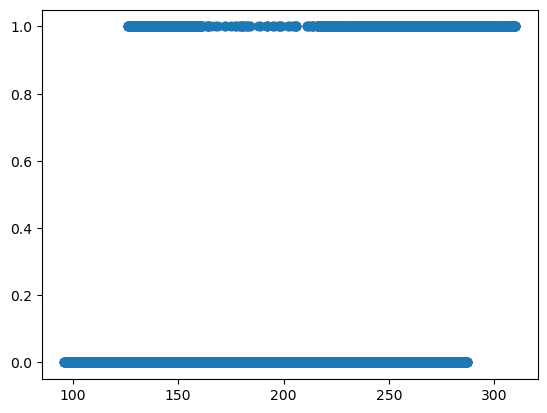

In [89]:
plt.scatter(df['average_montly_hours'],df['left'])

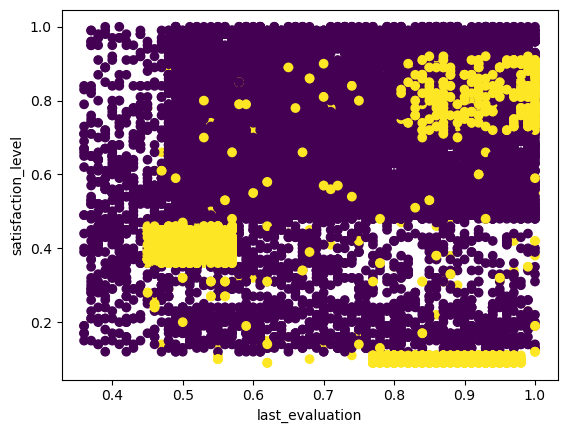

In [90]:
plt.scatter(df['last_evaluation'],df['satisfaction_level'],c=df['left'])
plt.xlabel('last_evaluation')
plt.ylabel('satisfaction_level')

plt.show()

In [91]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

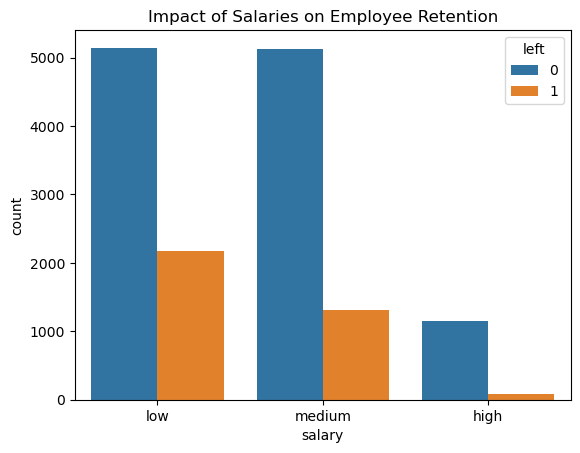

In [92]:
sns.countplot(x='salary', hue='left', data=df)
plt.title('Impact of Salaries on Employee Retention')
plt.show()


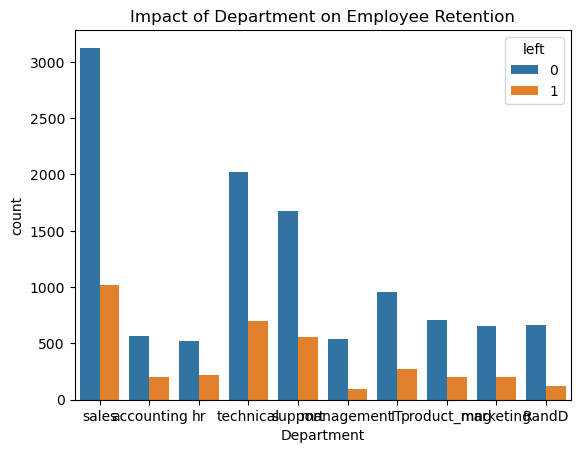

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

In [93]:
sns.countplot(x='Department', hue='left', data=df)
plt.title('Impact of Department on Employee Retention')
plt.show()
plt.figure(figsize=(30, 20))

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [99]:
X = df[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [102]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7483333333333333
